In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import random
import timeit

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
y_train = x_train
y_test = x_test

In [3]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
k = 0.6

x_train = x_train + k * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test = x_test + k * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train = np.clip(x_train, 0., 1.)
x_test = np.clip(x_test, 0., 1.)

autoencoder.fit(x_train, y_train,
                epochs=22,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, y_test))


Epoch 1/22
469/469 [==============================] - 3s 7ms/step - loss: 0.2466 - val_loss: 0.1875
Epoch 2/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1742 - val_loss: 0.1639
Epoch 3/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1601 - val_loss: 0.1546
Epoch 4/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1530 - val_loss: 0.1480
Epoch 5/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1481 - val_loss: 0.1443
Epoch 6/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1445 - val_loss: 0.1412
Epoch 7/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1417 - val_loss: 0.1390
Epoch 8/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1394 - val_loss: 0.1371
Epoch 9/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1375 - val_loss: 0.1359
Epoch 10/22
469/469 [==============================] - 3s 6ms/step - loss: 0.1361 - val_loss: 0.1339

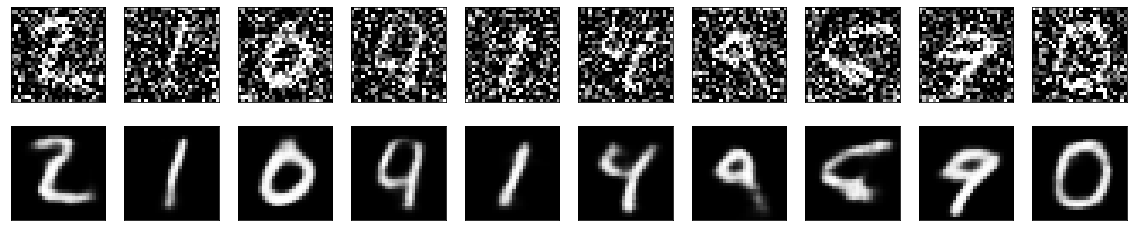

In [5]:
imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()